<a href="https://colab.research.google.com/github/robertmadril15/CS4410/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal k value using cross_val_score: 13





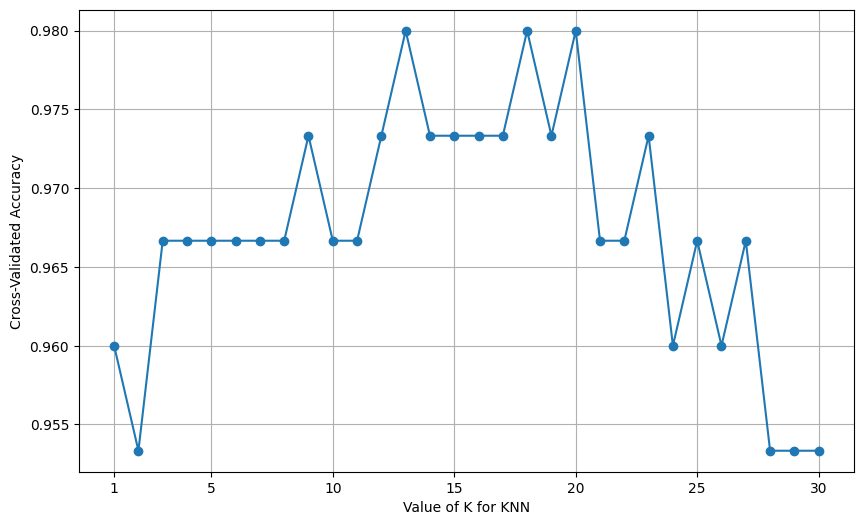

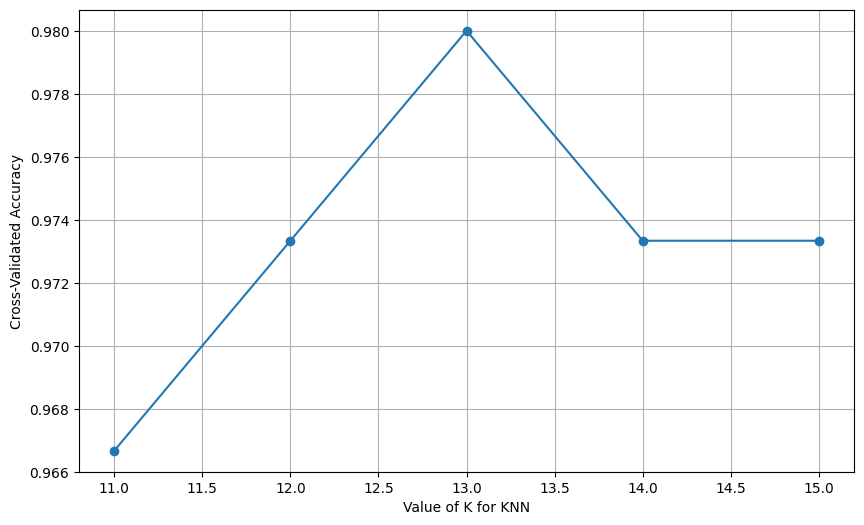




Optimal k using GridSearchCV: 13


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())

k_scores = list(k_scores)

max_accuracy = max(k_scores)
optimal_k = list(k_range)[k_scores.index(max_accuracy)]

print(f"Optimal k value using cross_val_score: {optimal_k}")

print("\n\n")



plt.figure(figsize=(10, 6))
plt.plot(list(k_range), k_scores, marker='o')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.grid(True)
plt.show()

print("\n\n")

k_zoom = list(range(11, 16))

scores_zoom = k_scores[10:15]

plt.figure(figsize=(10, 6))
plt.plot(k_zoom, scores_zoom, marker='o')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(np.arange(11, 15.5, 0.5))
plt.grid(True)
plt.show()

print("\n\n")

param_grid = {"n_neighbors": list(range(1, 31))}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X, y)

print(f"Optimal k using GridSearchCV: {grid.best_params_['n_neighbors']}")